# [Stack Overflow Developer Survey, 2017 | Kaggle](https://www.kaggle.com/stackoverflow/so-survey-2017)

참고 :
* https://www.kaggle.com/ash316/the-stack-survey
* [Student? Web-Dev? ML Expert? lets Explore all | Kaggle](https://www.kaggle.com/m2skills/student-web-dev-ml-expert-lets-explore-all)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pal = sns.color_palette()
%matplotlib inline

In [2]:
# 아래 경로에 data폴더를 넣어 데이터를 넣어두었다. 
# MacOS 사용자 일 때 데이터 로드가 되지 않는다면 아래의 경로에 data 폴더를 만들어 넣어준다.
# %pwd

In [3]:
%ls data/

stack-overflow-developer-survey-2017.zip
survey_results_public.csv*
survey_results_schema.csv*


In [4]:
question = pd.read_csv("data/survey_results_schema.csv")
data = pd.read_csv("data/survey_results_public.csv")
print(question.shape)
print(data.shape)

(154, 2)
(51392, 154)


In [5]:
# 어떤 질문이 있는지 출력해 본다.
question

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


## 스택오버플로우 사용자들의 개발 업무 언어

In [6]:
q = question[question.Column == 'HaveWorkedLanguage']
q.Question.values[0]

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [7]:
data['HaveWorkedLanguage_split'] = data['HaveWorkedLanguage'].apply(lambda x: str(x).split('; '))
data['HaveWorkedLanguage_split'].head()

0                            [Swift]
1    [JavaScript, Python, Ruby, SQL]
2                [Java, PHP, Python]
3           [Matlab, Python, R, SQL]
4                              [nan]
Name: HaveWorkedLanguage_split, dtype: object

In [8]:
# worked_language = data['HaveWorkedLanguage']
# axis는 행렬에서 0은 행을 1은 열을 의미하는 것으로 이해하면 편하다.
# 여기에서는 axis를 1로 주었기 때문에 열을 기준으로 판다스의 series 형태로 구성한다.
%time s = data.apply(lambda x: pd.Series(x['HaveWorkedLanguage_split']),axis=1)

CPU times: user 22.3 s, sys: 607 ms, total: 22.9 s
Wall time: 23.5 s


In [9]:
s.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,Python,Ruby,SQL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Java,PHP,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Matlab,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
s_stack = s.stack()
s_stack[:10]

0  0         Swift
1  0    JavaScript
   1        Python
   2          Ruby
   3           SQL
2  0          Java
   1           PHP
   2        Python
3  0        Matlab
   1        Python
dtype: object

In [11]:
s_reindex = s_stack.reset_index(level=1, drop=True)
s_reindex.name = 'Languages'
s_reindex[:10]

0         Swift
1    JavaScript
1        Python
1          Ruby
1           SQL
2          Java
2           PHP
2        Python
3        Matlab
3        Python
Name: Languages, dtype: object

In [12]:
worked_language_count = s_reindex[s_reindex != 'nan'].value_counts()
worked_language_count

JavaScript        22875
SQL               18754
Java              14524
C#                12476
Python            11704
PHP               10290
C++                8155
C                  6974
TypeScript         3488
Ruby               3324
Swift              2368
Objective-C        2349
VB.NET             2273
Assembly           1823
R                  1634
Perl               1585
VBA                1574
Matlab             1569
Go                 1557
Scala              1309
Groovy             1193
CoffeeScript       1192
Visual Basic 6     1071
Lua                1039
Haskell             649
F#                  457
Rust                416
Clojure             391
Elixir              380
Smalltalk           327
Erlang              281
Common Lisp         273
Dart                145
Julia               138
Hack                107
Name: Languages, dtype: int64

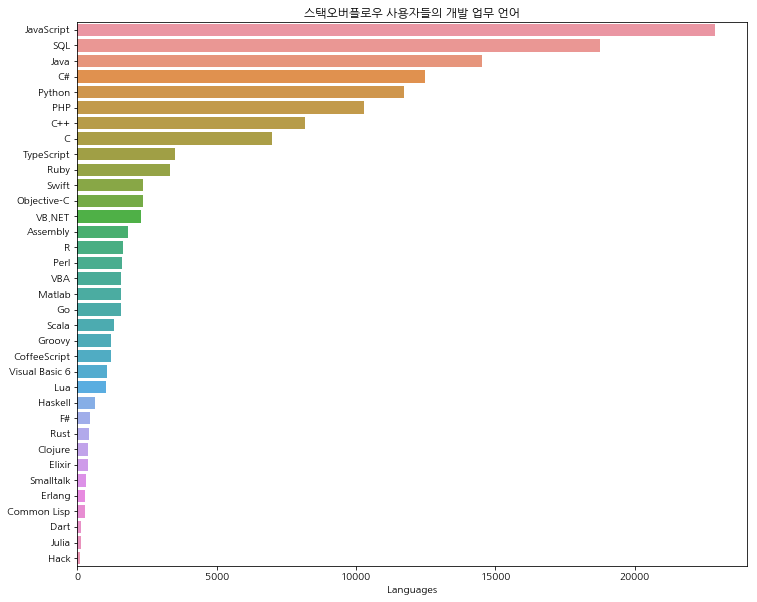

In [13]:
plt.figure(figsize=(12,10))
plt.title('스택오버플로우 사용자들의 개발 업무 언어')
sns.barplot(y=worked_language_count.index, x=worked_language_count)

## 응답 국가

In [14]:
q = question[question.Column == 'Country']
q.Question.values[0]

'In which country do you currently live?'

In [15]:
country = data['Country'].value_counts()[:30]
country

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Czech Republic          411
Belgium                 404
South Africa            380
Turkey                  363
Ukraine                 356
Mexico                  351
Ireland                 345
Hungary                 332
Philippines             328
Slovenia                303
Name: Country, dtype: int64

Text(0.5,1,'스택오버플로우 설문조사 응답국가')

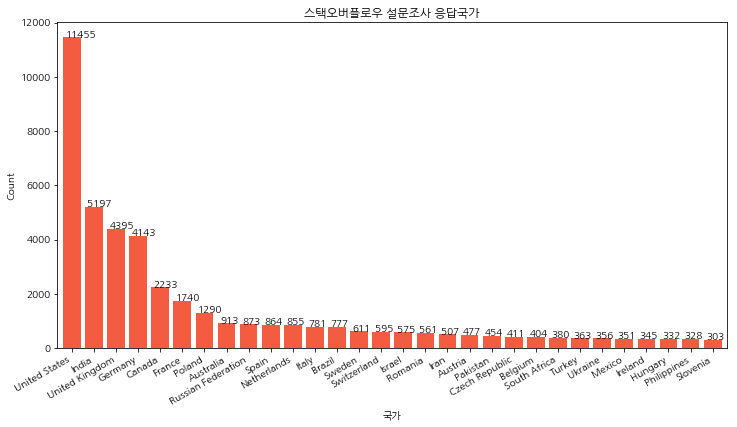

In [16]:
plt.subplots(figsize=(12,6))
ax=country.plot.bar(width=0.8,color='#f45c42')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.10, p.get_height() + 0.25))

plt.xticks(rotation=30, ha='right')
plt.xlabel('국가')
plt.ylabel('Count')
plt.title('스택오버플로우 설문조사 응답국가')

### 응답자 중 국가별 학생 수

In [17]:
q = question[question.Column == 'Professional']
q.Question.values[0]

'Which of the following best describes you?'

Text(0,0.5,'Count')

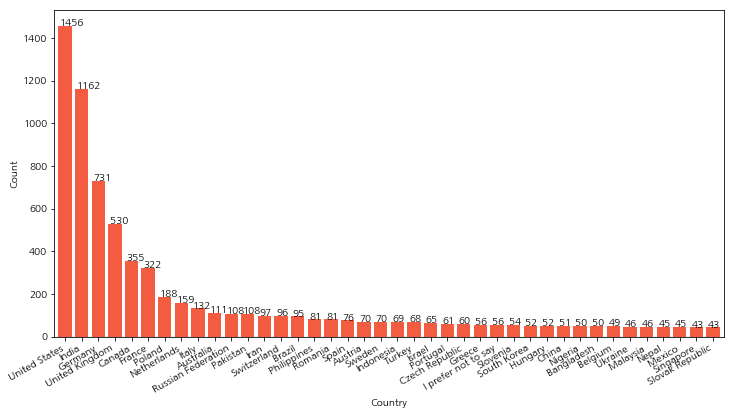

In [18]:
plt.subplots(figsize=(12,6))
students = data[data['Professional'] == 'Student']

ax = students['Country'].value_counts()[:40].plot.bar(width=0.8,color='#f45c42')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.10, p.get_height() + 0.25))
    
plt.xticks(rotation=30, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')

## 한국 응답자

In [19]:
korea = data.loc[data['Country'] == 'South Korea']
korea.shape

(164, 155)

In [20]:
korea.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,HaveWorkedLanguage_split
702,703,Student,"Yes, I program as a hobby",South Korea,"Yes, full-time","Not employed, but looking for work",Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,...,Male,A master's degree,East Asian,Strongly agree,Somewhat agree,Disagree,Agree,NaN,30.52157,[C]
2161,2162,Student,"Yes, I program as a hobby",South Korea,No,I prefer not to say,Primary/elementary school,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[nan]
2561,2562,Professional developer,No,South Korea,No,Employed full-time,Bachelor's degree,"Information technology, networking, or system ...",All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[nan]
2569,2570,Professional developer,"Yes, both",South Korea,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,Never,20 to 99 employees,...,Male,A bachelor's degree,East Asian; White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN,"[Java, SQL]"
2645,2646,Professional developer,No,South Korea,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[nan]


## 취업 상태, 취미여부

([<matplotlib.patches.Wedge at 0x11dff8438>,
 [Text(0.963896,0.530004,'Student'),
  Text(-1.09711,-0.0797474,'Professional developer'),
  Text(0.939992,-0.571328,'Professional non-developer who sometimes writes code'),
  Text(1.0838,-0.188091,'Used to be a professional developer'),
  Text(1.09828,-0.0614282,'None of these')])

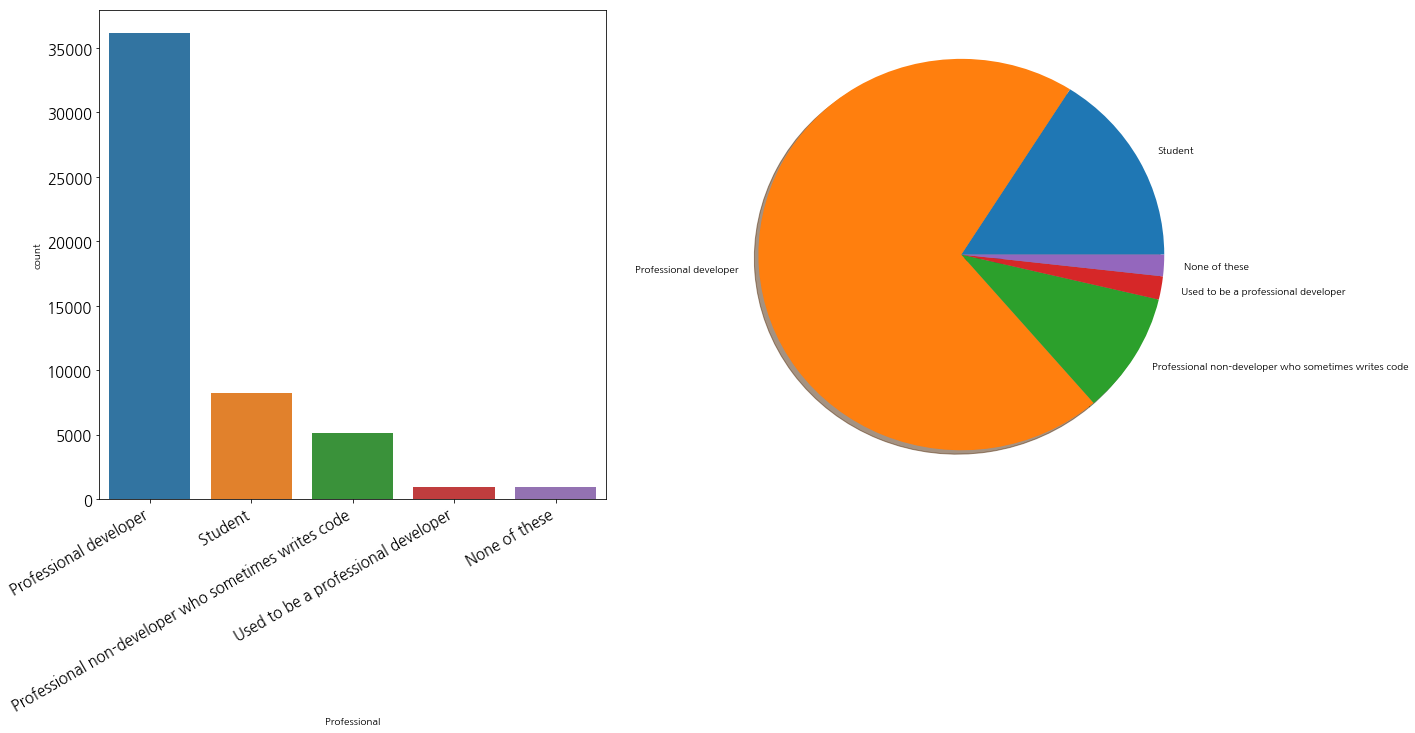

In [21]:
from collections import Counter

fig, axes = plt.subplots(ncols=2, figsize=(20,9))

data.Professional.unique()

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
plt.tick_params(labelsize=15)
sns.countplot(x = data.Professional, 
              order = data.Professional.value_counts().index, ax=axes[0])

axes[1].pie(dict(Counter(data.Professional)).values(),
        labels = dict(Counter(data.Professional)).keys(),
        shadow = True,
        startangle = 0)

현재 전문 개발자로 일하고 있는 사람이 학생의 비율보다 3배 이상 높으며, 전문 개발자는 아니더라도 때때로 코드를 다룬다는 응답자의 비율이 그 다음을 잇는다.

그리고 다음 그래프에서 보면 응답자의 대부분이 풀타임으로 일하고 있는 상태이며 프로그램이 취미인 사람들의 비율이 높다.

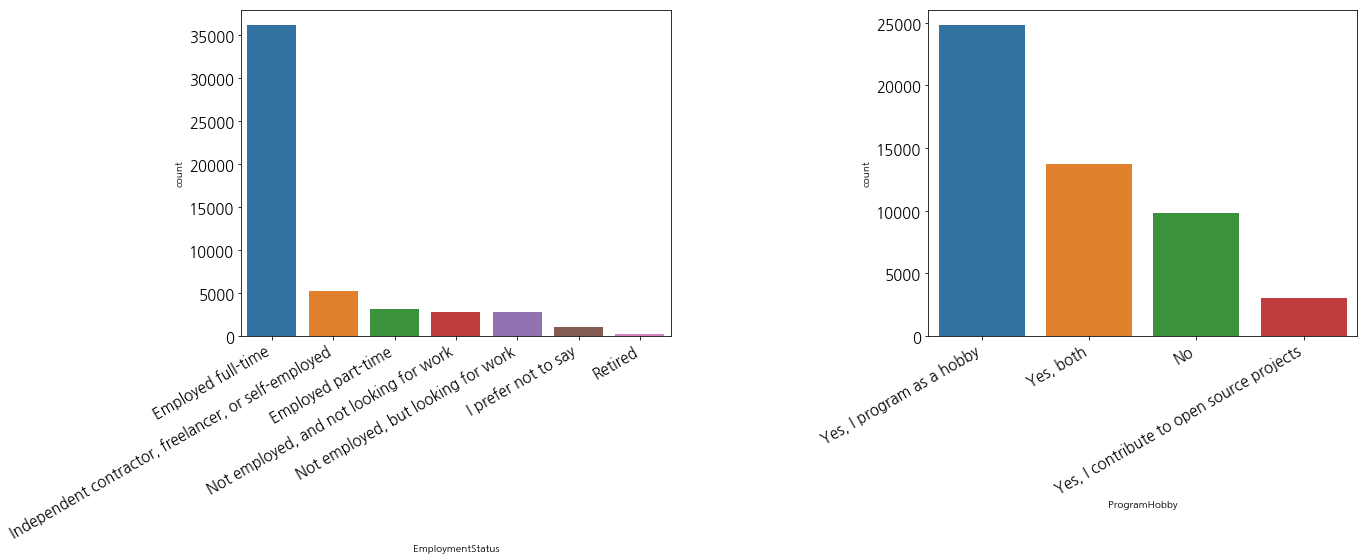

In [22]:
fig, axes = plt.subplots(1,2,figsize=(20,6))

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
plt.subplots_adjust(hspace=0.1,wspace=0.6)
axes[0].tick_params(labelsize=15)

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].tick_params(labelsize=15)

data.EmploymentStatus.unique()
sns.countplot(x = data.EmploymentStatus, 
              order = data.EmploymentStatus.value_counts().index, ax=axes[0])

sns.countplot(x = data.ProgramHobby, 
              order = data.ProgramHobby.value_counts().index, ax=axes[1])


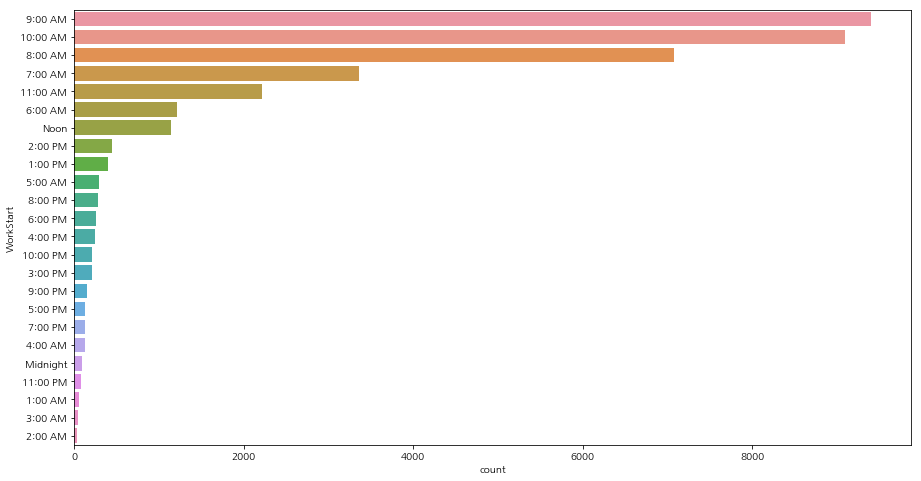

In [23]:
plt.subplots(figsize=(15,8))  
data.WorkStart.unique()
sns.countplot(y = data.WorkStart, order = data.WorkStart.value_counts().index)

## 직종별 응답자

In [24]:
from collections import Counter
developerType = []
temp = data.DeveloperType.drop(data.loc[data.DeveloperType.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ', '').split(";")
        developerType.extend(types)
print(Counter(developerType))

Counter({'Webdeveloper': 26235, 'Desktopapplicationsdeveloper': 10435, 'Mobiledeveloper': 8326, 'Databaseadministrator': 5192, 'Developerwithastatisticsormathematicsbackground': 4091, 'Systemsadministrator': 4086, 'DevOpsspecialist': 4015, 'Embeddedapplications/devicesdeveloper': 3352, 'Datascientist': 3045, 'Other': 2694, 'Graphicsprogramming': 1731, 'Graphicdesigner': 1426, 'Machinelearningspecialist': 1379, 'Qualityassuranceengineer': 1252})


In [25]:
# 위 리스트 형태로 출력 된 타입을 판다스의 Series와 value_counts()를 사용해 소트해서 본다.
pd.Series(developerType).value_counts()

Webdeveloper                                       26235
Desktopapplicationsdeveloper                       10435
Mobiledeveloper                                     8326
Databaseadministrator                               5192
Developerwithastatisticsormathematicsbackground     4091
Systemsadministrator                                4086
DevOpsspecialist                                    4015
Embeddedapplications/devicesdeveloper               3352
Datascientist                                       3045
Other                                               2694
Graphicsprogramming                                 1731
Graphicdesigner                                     1426
Machinelearningspecialist                           1379
Qualityassuranceengineer                            1252
dtype: int64

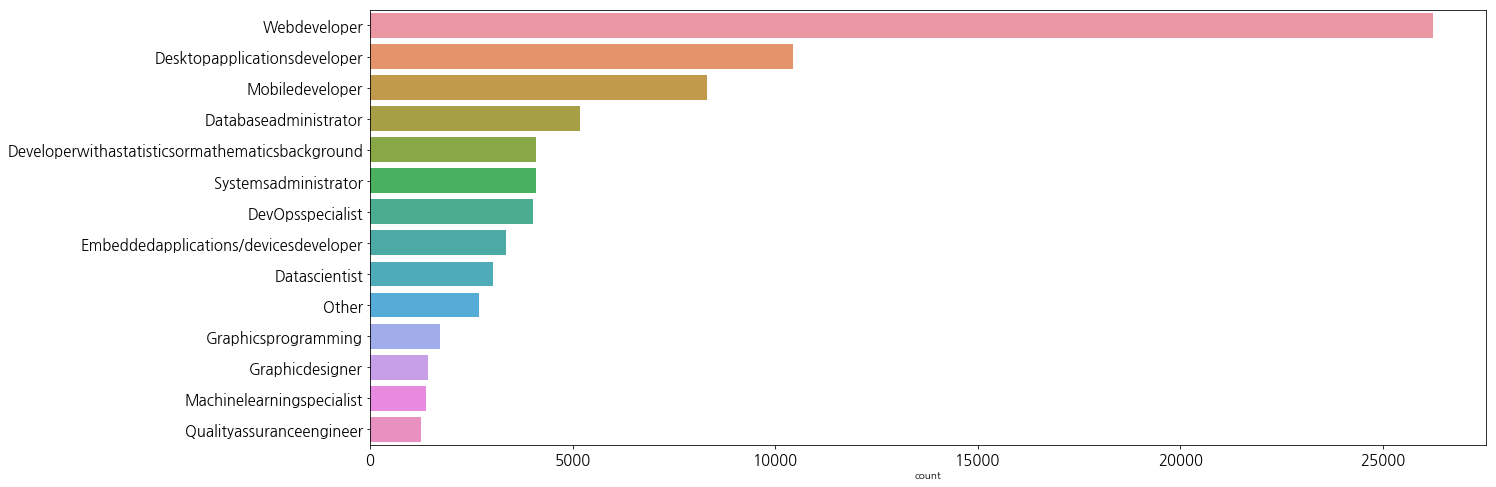

In [26]:
plt.subplots(figsize=(20,8))   
sns.countplot(y = developerType,
             order = pd.Series(developerType).value_counts().index)

plt.tick_params(labelsize=15)

웹개발자가 가장 많으며, 데스크탑 어플리케이션, 모바일 개발자, DBA순이다. 그 다음으로 통계와 수학을 백그라운드로 가진 개발자, 시스템 어드민, 데브옵스, 임베디드 디바이스 개발자, 데이터 사이언티스트라고 응답했다.

## 전공
컴퓨터 사이언스에 가장 많은 응답이 있었으며 그 다음으로도 컴퓨터 공학, 전자공학, 컴퓨터 프로그래밍, 웹개발 순이었다.
그리고 일부 응답에서 미술과 예술, 심리, 보건 등이 있다.

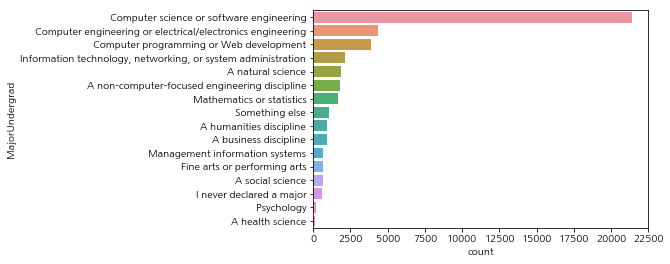

In [27]:
data.MajorUndergrad.unique()
sns.countplot(y = data.MajorUndergrad, order = data.MajorUndergrad.value_counts().index)

In [28]:
temp = data.HaveWorkedLanguage.drop(data.loc[data.HaveWorkedLanguage.isnull()].index)
languages = []
row = {}
for i in temp:
    if i is not None: 
        types = i.split(";")
        languages.extend(types)
        
# 제대로 저장되었는지 상위 20개만 확인해 본다.        
print(languages[:20])
# 리스트 형태로 만들어진 languages에서 언어별로 카운트를 세어본다.
popularLanguages = Counter(languages).most_common(20)
popularLanguages

['Swift', 'JavaScript', ' Python', ' Ruby', ' SQL', 'Java', ' PHP', ' Python', 'Matlab', ' Python', ' R', ' SQL', 'JavaScript', ' PHP', ' Rust', 'Matlab', ' Python', 'CoffeeScript', ' Clojure', ' Elixir']


[(' SQL', 18466),
 (' JavaScript', 17159),
 (' Python', 10719),
 (' PHP', 9765),
 (' Java', 8622),
 ('C#', 8596),
 ('Java', 5902),
 ('JavaScript', 5716),
 ('C', 5563),
 (' C++', 4628),
 (' C#', 3880),
 ('C++', 3527),
 (' TypeScript', 3479),
 (' Ruby', 3174),
 (' Swift', 2296),
 (' VB.NET', 2240),
 (' Objective-C', 2044),
 ('Assembly', 1823),
 (' VBA', 1546),
 (' R', 1482)]

In [29]:
languages = [i[0] for i in popularLanguages]
lang_count = [i[1] for i in popularLanguages]

df = pd.DataFrame()
df['Languages'] = languages
df['Number_of_Users'] = lang_count
df.head(20)             

,Languages,Number_of_Users
0,SQL,18466
1,JavaScript,17159
2,Python,10719
3,PHP,9765
4,Java,8622
5,C#,8596
6,Java,5902
7,JavaScript,5716
8,C,5563
9,C++,4628
